Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in **making health conditions for working professionals better.** MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. **For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp).**

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.


**The Process:**
MedCamp employees / volunteers reach out to people and drive registrations.
During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 

**Other things to note:**
Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.

For a few camps, there was hardware failure, so some information about date and time of registration is lost.
MedCamp runs 3 formats of these camps. The first and second format provides people with an instantaneous health score. The third format provides information about several health issues through various awareness stalls.

**Favorable outcome:**
For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
**You need to predict the chances (probability) of having a favourable outcome.**

In [31]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,8]
pd.set_option('display.max_columns', 50)

<IPython.core.display.Javascript object>

In [32]:
train = pd.read_csv("~/Downloads/Healthcare/train.csv")
hcdetail = pd.read_csv("~/Downloads/Healthcare/Health_Camp_Detail.csv")
fhc = pd.read_csv("~/Downloads/Healthcare/First_Health_Camp_Attended.csv")
pp = pd.read_csv("~/Downloads/Healthcare/Patient_Profile.csv")
shc = pd.read_csv("~/Downloads/Healthcare/Second_Health_Camp_Attended.csv")
thc = pd.read_csv("~/Downloads/Healthcare/Third_Health_Camp_Attended.csv")
test = pd.read_csv("~/Downloads/Healthcare/test_l0Auv8Q.csv")

In [33]:
train.shape, test.shape

((75278, 8), (35249, 8))

In [34]:
train.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')

In [35]:
hcdetail.columns

Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3'],
      dtype='object')

In [36]:
pp.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [37]:
thc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')

In [38]:
# Lets combine the data 

combined = pd.concat([train, test], ignore_index = True)

In [39]:
combined = pd.merge(combined,pp,on=["Patient_ID"],how="left")
combined = pd.merge(combined,fhc,on=["Patient_ID","Health_Camp_ID"],how="left")
combined = pd.merge(combined,shc,on=["Patient_ID","Health_Camp_ID"],how="left")
combined = pd.merge(combined,thc,on=["Patient_ID","Health_Camp_ID"],how="left")
combined = pd.merge(combined,hcdetail,on=["Health_Camp_ID"],how="left")

In [40]:
combined.shape

(110527, 29)

In [69]:
combined.head(10)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Days_Before_Interaction,Camp_Duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,-59
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,-59
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,-751
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,-17
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,-4
5,494493,6570,2005-05-20,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-07-09,2005-07-22,First,E,2,474.0,-13
6,523001,6562,2005-05-22,0,0,0,0,0,0,0,0,0,None,None,None,2005-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-11-24,2005-06-02,First,F,2,45.0,-190
7,500733,6535,2004-01-31,0,0,0,0,0,0,0,0,0,None,None,None,2003-03-23,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,314.0,-17
8,501155,6538,2004-01-31,0,0,0,0,0,0,0,0,0,None,None,None,2004-01-31,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-09,2005-02-04,First,F,2,0.0,-392
9,501457,6538,2004-08-12,0,0,0,0,0,0,0,0,0,0,None,None,2003-01-28,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-09,2005-02-04,First,F,2,562.0,-392


In [49]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Patient_ID                 110527 non-null  int64         
 1   Health_Camp_ID             110527 non-null  int64         
 2   Registration_Date          110193 non-null  datetime64[ns]
 3   Var1                       110527 non-null  int64         
 4   Var2                       110527 non-null  int64         
 5   Var3                       110527 non-null  int64         
 6   Var4                       110527 non-null  int64         
 7   Var5                       110527 non-null  int64         
 8   Online_Follower            110527 non-null  int64         
 9   LinkedIn_Shared            110527 non-null  int64         
 10  Twitter_Shared             110527 non-null  int64         
 11  Facebook_Shared            110527 non-null  int64   

In [54]:
combined["Registration_Date"] = pd.to_datetime(combined["Registration_Date"], dayfirst=True) #Converted in Date
combined["First_Interaction"] = pd.to_datetime(combined["First_Interaction"], dayfirst=True) # Converted in Date

In [56]:
# Lets find out the days between the Registration and First Interaction
combined["Days_Before_Interaction"] = combined.Registration_Date - combined.First_Interaction

In [58]:
combined["Days_Before_Interaction"] = combined.Days_Before_Interaction.dt.days

In [96]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Patient_ID                 110527 non-null  int64         
 1   Health_Camp_ID             110527 non-null  int64         
 2   Registration_Date          110193 non-null  datetime64[ns]
 3   Var1                       110527 non-null  int64         
 4   Var2                       110527 non-null  int64         
 5   Var3                       110527 non-null  int64         
 6   Var4                       110527 non-null  int64         
 7   Var5                       110527 non-null  int64         
 8   Online_Follower            110527 non-null  int64         
 9   LinkedIn_Shared            110527 non-null  int64         
 10  Twitter_Shared             110527 non-null  int64         
 11  Facebook_Shared            110527 non-null  int64   

In [63]:
combined["Camp_Start_Date"] = pd.to_datetime(combined["Camp_Start_Date"], dayfirst=True) #Converted in Date
combined["Camp_End_Date"] = pd.to_datetime(combined["Camp_End_Date"], dayfirst=True) # Converted in Date

In [64]:
combined["Camp_Duration"] =combined.Camp_Start_Date - combined.Camp_End_Date
combined["Camp_Duration"] =combined.Camp_Duration.dt.days

In [85]:
combined["Camp_Duration"] = np.abs(combined.Camp_Duration).astype(int)

In [79]:
combined["Camp_Registration"] = np.abs(combined.Registration_Date - combined.Camp_Start_Date).dt.days

In [87]:
combined["Camp_EndRegistration"] = np.abs(combined.Registration_Date - combined.Camp_End_Date).dt.days

In [88]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Days_Before_Interaction,Camp_Duration,Camp_Registration,Camp_EndRegistration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,278.0,59,25.0,34.0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,344.0,59,2.0,57.0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,676.0,751,194.0,557.0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0.0,17,6.0,11.0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,970.0,4,30.0,34.0


<IPython.core.display.Javascript object>

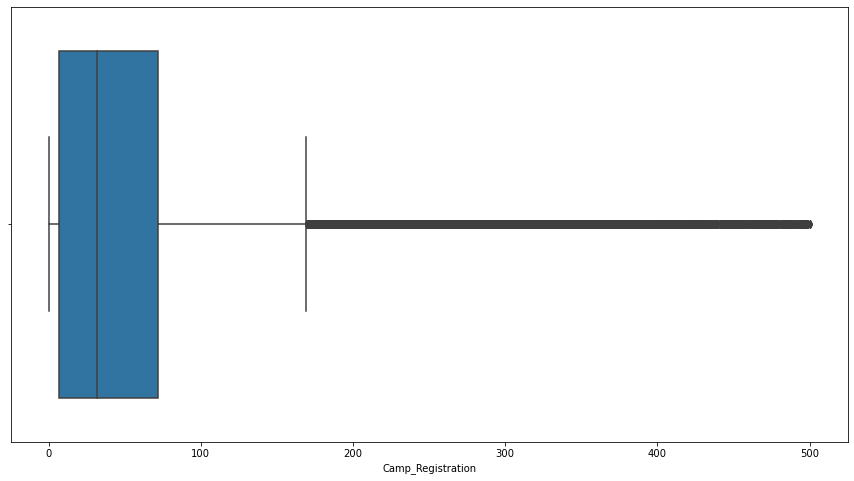

In [91]:
sns.boxplot(combined.Camp_Registration)

<IPython.core.display.Javascript object>

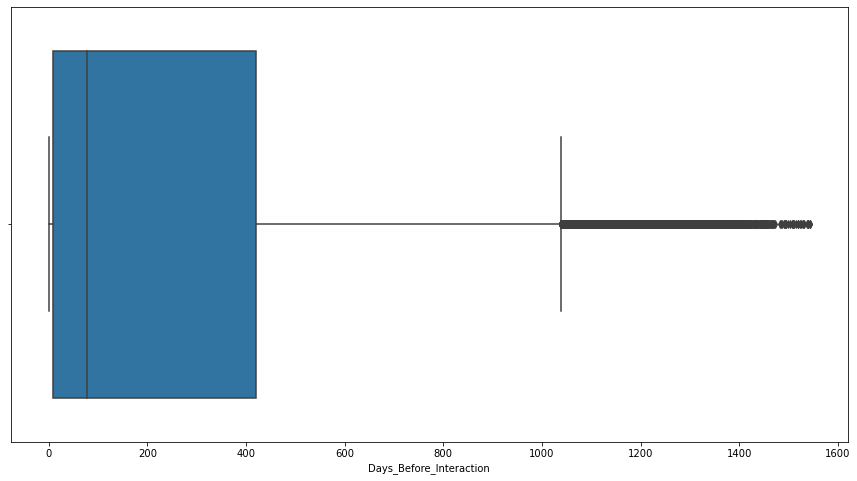

In [92]:
sns.boxplot(combined.Days_Before_Interaction)

In [93]:
def date_there(a,b,c):
    if a<b<c:
        return 1
    else:
        return 0
combined["date_there_in"] = combined.apply(lambda x:date_there(x["Camp_Start_Date"],
                                                               x["First_Interaction"],
                                                              x["Camp_End_Date"]),axis=1)

In [150]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Days_Before_Interaction,Camp_Duration,Camp_Registration,Camp_EndRegistration,date_there_in,FI_Registration,Registration_Year,First_Interaction_Year,Camp_Start_Year,Employer,City
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,3,0,2,278.0,59,25.0,34.0,0,278.0,2005.0,2004,2005,-1,-1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,3,0,2,344.0,59,2.0,57.0,0,344.0,2005.0,2004,2005,0,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,2,1,2,676.0,751,194.0,557.0,0,676.0,2006.0,2004,2005,-1,-1
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,1,2,2,0.0,17,6.0,11.0,1,0.0,2004.0,2004,2004,-1,1
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,2,1,2,970.0,4,30.0,34.0,0,970.0,2006.0,2003,2006,1,1


In [95]:
combined.date_there_in.value_counts()

0    82613
1    27914
Name: date_there_in, dtype: int64

In [101]:
# Days between the Camp Registration and First Interaction

combined["FI_Registration"] = (combined.Registration_Date - combined.First_Interaction).dt.days

In [102]:
combined.FI_Registration.describe()

count    110193.000000
mean        249.117076
std         326.026614
min           0.000000
25%           8.000000
50%          77.000000
75%         420.000000
max        1543.000000
Name: FI_Registration, dtype: float64

In [109]:
# Lets Extract Year from Dates
combined.select_dtypes(include='datetime').columns

Index(['Registration_Date', 'First_Interaction', 'Camp_Start_Date',
       'Camp_End_Date'],
      dtype='object')

In [168]:
# Registration Days, Months and Year
combined["Registration_Days"] = combined["Registration_Date"].dt.day
combined["Registration_Month"] = combined["Registration_Date"].dt.month
combined["Registration_Year"] = combined["Registration_Date"].dt.year

In [174]:
# Lets Find the Registration Per Day, Per Month & Per Year

combined["Patients_PerDay"] = combined.groupby(["Patient_ID"])["Registration_Days"].transform("nunique")
combined["Patients_PerMonth"] = combined.groupby(["Patient_ID"])["Registration_Month"].transform("nunique")
combined["Patients_PerYear"] = combined.groupby(["Patient_ID"])["Registration_Year"].transform("nunique")
combined["Patient_PerHC"] = combined.groupby(['Health_Camp_ID'])['Patient_ID'].transform('nunique')

In [116]:
combined["First_Interaction_Year"] = combined["First_Interaction"].dt.year
combined["Camp_Start_Year"] = combined["Camp_Start_Date"].dt.year

In [126]:
# Lets Look into Categories...
map1 = {"First":1, "Second":2, "Third":3}
combined["Category1"] = combined.Category1.map(map1)

In [134]:
combined.Category2.unique()
combined["Category2"] =pd.factorize(combined.Category2)[0]

In [143]:
#Employer Category
combined.Employer_Category.mode()[0]

'Technology'

In [146]:
combined["Employer"] = combined.Employer_Category.factorize()[0]

In [148]:
# City Type
combined.City_Type.value_counts()

B    12242
H    10203
D     7881
C     6343
G     6298
E     6009
A     5905
I     4904
F     4140
Name: City_Type, dtype: int64

In [149]:
combined["City"] =pd.factorize(combined.City_Type)[0]

In [157]:
# HealthID Frequency
mapped = combined.Health_Camp_ID.value_counts(normalize=True)
combined["Health_ID_F"] = combined.Health_Camp_ID.map(mapped)

In [162]:
# Online Activity
combined["Online_Activity"] =combined['Online_Follower']+combined['LinkedIn_Shared']+combined['Twitter_Shared']+combined["Facebook_Shared"] 

In [165]:
combined.Online_Activity.value_counts()

0    98940
2     3963
1     3577
3     3015
4     1032
Name: Online_Activity, dtype: int64

In [185]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Days_Before_Interaction,Camp_Duration,Camp_Registration,Camp_EndRegistration,date_there_in,FI_Registration,Registration_Year,First_Interaction_Year,Camp_Start_Year,Employer,City,Health_ID_F,Online_Activity,Registration_Month,Registration_Days,Patients_PerDay,Patients_PerMonth,Patients_PerYear,Patient_PerHC,target
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,3,0,2,278.0,59,25.0,34.0,0,278.0,2005.0,2004,2005,-1,-1,0.025668,0,9.0,10.0,9,7,3,2837,1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,3,0,2,344.0,59,2.0,57.0,0,344.0,2005.0,2004,2005,0,0,0.025668,0,8.0,18.0,16,12,4,2837,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,2,1,2,676.0,751,194.0,557.0,0,676.0,2006.0,2004,2005,-1,-1,0.032544,0,4.0,29.0,5,4,2,3597,1
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,1,2,2,0.0,17,6.0,11.0,1,0.0,2004.0,2004,2004,-1,1,0.017028,0,2.0,7.0,4,4,3,1882,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,2,1,2,970.0,4,30.0,34.0,0,970.0,2006.0,2003,2006,1,1,0.034589,1,2.0,28.0,17,9,4,3823,1


In [176]:
# Creating Target Variable - If either of these values are present, impute 1 else 0
def outcome(a,b,c,d):
    if((a>0)|(b>0)|(c>0)|(d>0)):
        return(1)
    else:
        return(0)

In [181]:
# Creating Target Variable - If either of these values are present, impute 1 else 0
combined["target"] = combined.apply(lambda x:outcome(x["Health_Score"], x["Health Score"],
                                x["Number_of_stall_visited"], x['Last_Stall_Visited_Number']), axis = 1)

In [182]:
combined.target.value_counts()

0    89993
1    20534
Name: target, dtype: int64

In [187]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Days_Before_Interaction,Camp_Duration,Camp_Registration,Camp_EndRegistration,date_there_in,FI_Registration,Registration_Year,First_Interaction_Year,Camp_Start_Year,Employer,City,Health_ID_F,Online_Activity,Registration_Month,Registration_Days,Patients_PerDay,Patients_PerMonth,Patients_PerYear,Patient_PerHC,target
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,3,0,2,278.0,59,25.0,34.0,0,278.0,2005.0,2004,2005,-1,-1,0.025668,0,9.0,10.0,9,7,3,2837,1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,3,0,2,344.0,59,2.0,57.0,0,344.0,2005.0,2004,2005,0,0,0.025668,0,8.0,18.0,16,12,4,2837,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,2,1,2,676.0,751,194.0,557.0,0,676.0,2006.0,2004,2005,-1,-1,0.032544,0,4.0,29.0,5,4,2,3597,1
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,1,2,2,0.0,17,6.0,11.0,1,0.0,2004.0,2004,2004,-1,1,0.017028,0,2.0,7.0,4,4,3,1882,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,2,1,2,970.0,4,30.0,34.0,0,970.0,2006.0,2003,2006,1,1,0.034589,1,2.0,28.0,17,9,4,3823,1


In [186]:
#Drop the Unnecessary Variables

combined.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Donation',
       'Health_Score', 'Unnamed: 4', 'Health Score', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number', 'Camp_Start_Date', 'Camp_End_Date',
       'Category1', 'Category2', 'Category3', 'Days_Before_Interaction',
       'Camp_Duration', 'Camp_Registration', 'Camp_EndRegistration',
       'date_there_in', 'FI_Registration', 'Registration_Year',
       'First_Interaction_Year', 'Camp_Start_Year', 'Employer', 'City',
       'Health_ID_F', 'Online_Activity', 'Registration_Month',
       'Registration_Days', 'Patients_PerDay', 'Patients_PerMonth',
       'Patients_PerYear', 'Patient_PerHC', 'target'],
      dtype='object')

In [193]:
new = combined.drop(["Patient_ID", "Health_Camp_ID", "Registration_Date", 
               'Health_Score', 'Unnamed: 4', 'Health Score', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number', 'Camp_Start_Date', 'Camp_End_Date', "LinkedIn_Shared", 'Twitter_Shared', 'Facebook_Shared',
              "Education_Score", "City_Type", 'Employer_Category', "Donation", "Online_Follower", "First_Interaction"], axis = 1)

In [199]:
new.head()

,Var1,Var2,Var3,Var4,Var5,Income,Age,Category1,Category2,Category3,Days_Before_Interaction,Camp_Duration,Camp_Registration,Camp_EndRegistration,date_there_in,FI_Registration,Registration_Year,First_Interaction_Year,Camp_Start_Year,Employer,City,Health_ID_F,Online_Activity,Registration_Month,Registration_Days,Patients_PerDay,Patients_PerMonth,Patients_PerYear,Patient_PerHC,target
0,4,0,0,0,2,NaN,NaN,3,0,2,278.0,59,25.0,34.0,0,278.0,2005.0,2004,2005,-1,-1,0.025668,0,9.0,10.0,9,7,3,2837,1
1,45,5,0,0,7,1,40,3,0,2,344.0,59,2.0,57.0,0,344.0,2005.0,2004,2005,0,0,0.025668,0,8.0,18.0,16,12,4,2837,0
2,0,0,0,0,0,NaN,NaN,2,1,2,676.0,751,194.0,557.0,0,676.0,2006.0,2004,2005,-1,-1,0.032544,0,4.0,29.0,5,4,2,3597,1
3,0,0,0,0,0,NaN,NaN,1,2,2,0.0,17,6.0,11.0,1,0.0,2004.0,2004,2004,-1,1,0.017028,0,2.0,7.0,4,4,3,1882,0
4,15,1,0,0,7,1,40,2,1,2,970.0,4,30.0,34.0,0,970.0,2006.0,2003,2006,1,1,0.034589,1,2.0,28.0,17,9,4,3823,1


In [198]:
# Convert None into np.nan
new.Income.replace(to_replace = "None", value = np.nan, inplace =True)
new.Age.replace(to_replace = "None", value = np.nan, inplace =True)

In [204]:
new.Age.unique()

array([nan, '40', '50', '41', '72', '51', '42', '44', '46', '39', '43',
       '38', '74', '71', '52', '53', '47', '73', '48', '49', '45', '56',
       '63', '37', '36', '57', '35', '60', '70', '64', '54', '55', '59',
       '33', '34', '58', '62', '80', '66', '61', '65', '31', '69', '75',
       '76', '68', '67', '77', '32', '78', '30'], dtype=object)

In [206]:
new["Age"]= new.Age.astype("float")

In [210]:
new["Income"]= new.Income.astype("float")

In [212]:
new.fillna(-999, inplace = True)

### Model

In [215]:
# Split the Data in Train and Test
train.shape, test.shape

((75278, 8), (35249, 8))

In [218]:
newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

In [219]:
newtest.drop("target", axis = 1, inplace = True)

In [223]:
# Define the X and y
X = newtrain.drop("target", axis = 1)
y = newtrain.target

In [224]:
# Random Forest, Gradient and LGBM
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
etree = ExtraTreesClassifier

In [238]:
pred_rf = rf.fit(X, y).predict_proba(newtest)
pred_gbm = gbm.fit(X, y).predict_proba(newtest)
#pred_etree = etree.fit(X, y).predict(newtest)

In [240]:
solution = pd.DataFrame({"Patient_ID":test.Patient_ID,
                        "Health_Camp_ID":test.Health_Camp_ID,
                        "Outcome":pred_rf[:, 1]})

solution.to_csv("RF_Prob.csv", index = False) # 0.70

solution = pd.DataFrame({"Patient_ID":test.Patient_ID,
                        "Health_Camp_ID":test.Health_Camp_ID,
                        "Outcome":pred_gbm[:, 1]})

solution.to_csv("GBM_Prob.csv", index = False) # 0.75

In [228]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
pred_xgb = xgb.fit(X, y).predict_proba(newtest)

In [234]:
pred_xgb[:, 1]

array([0.21213637, 0.3784998 , 0.22097035, ..., 0.44141358, 0.20397767,
       0.67292696], dtype=float32)

In [235]:
solution = pd.DataFrame({"Patient_ID":test.Patient_ID,
                        "Health_Camp_ID":test.Health_Camp_ID,
                        "Outcome":pred_xgb[:, 1]})

In [236]:
solution.to_csv("XGB_Prob.csv", index = False) # 0.717

In [237]:
cd

C:\Users\mukul


In [241]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

pred_lgbm = lgbm.fit(X, y).predict_proba(newtest)
solution = pd.DataFrame({"Patient_ID":test.Patient_ID,
                        "Health_Camp_ID":test.Health_Camp_ID,
                        "Outcome":pred_lgbm[:, 1]})

solution.to_csv("LGBM_Prob.csv", index = False) # 0.745

### Summary of Models

* Random Forest Model **0.70**
* XGBModel **0.717**
* LGBM Model **0.745**
* GradientBoosting Model **0.75**